In [34]:
import pprint
import json
import pathlib
import pandas as pd
import os
import importlib

In [35]:
from lib.helpers import *
from lib.crypto import *
from lib.sentimentframe import *

pp = pprint.PrettyPrinter(indent=4)

In [36]:
dirty_hourly = pathlib.Path('../../../data/dirty/hourly/')
jsonl_files = os.listdir(dirty_hourly)

## Parse/Extract data for ALL Days/files in folder

`tilter_tweet_fields_as_dict` pulls specific fields/keys from a tweet, and returns them in a list of dicts

In [37]:
all_tweets = []

for file in jsonl_files:
    all_tweets.extend(filter_tweet_fields_as_dict(pathlib.Path(dirty_hourly,file)))

In [38]:
print(len(all_tweets))

204000


## Convert List of Dicts to a DataFrame

In [39]:
all_tweets_df = pd.DataFrame(all_tweets)

In [16]:
all_tweets_df.describe()

,id,retweet_count
count,2.040000e+05,204000.000000
mean,1.186981e+18,0.424088
std,1.778519e+15,9.031181
min,1.183905e+18,0.000000
25%,1.185442e+18,0.000000
50%,1.186982e+18,0.000000
75%,1.188518e+18,0.000000
max,1.190056e+18,2028.000000


In [17]:
all_tweets_df.dtypes

created_at               object
full_text                object
geo                      object
id                        int64
lang                     object
mention_ids              object
mentions                 object
retweet_count             int64
rt_status_id             object
rt_status_screen_name    object
screen_name              object
dtype: object

## Show tweets that contain BTC

In [41]:
all_tweets_df[all_tweets_df['full_text'].str.contains('BTC')].head()

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth
6,Tue Oct 29 11:58:46 +0000 2019,RT @BTCTN: Why Central Banks Are Not Designed ...,None,1189149572259553281,en,[3367334171],[BTCTN],0,3367334171,BTCTN,Vindyne8
17,Tue Oct 29 11:58:19 +0000 2019,"RT @whale_alert: 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 🚨 43,653 #...",None,1189149460934213632,en,[1039833297751302144],[whale_alert],0,1039833297751302144,whale_alert,suminch3977
19,Tue Oct 29 11:58:17 +0000 2019,RT @bitcoinzay: If i thought i was too poor wh...,None,1189149453539782658,en,[54307047],[bitcoinzay],0,54307047,bitcoinzay,cokebyparis
28,Tue Oct 29 11:58:03 +0000 2019,@HuobiWallet $Bitcoin is the future\n\n#WeLoveBTC,None,1189149395536764928,en,[999509989239615489],[HuobiWallet],0,NaN,NaN,Crypto24842130


In [42]:
all_tweets_df['screen_name'].nunique()

70319

# Top 25 by Tweet

In [60]:
all_tweets_df.groupby(['screen_name'])['id','full_text'].count().sort_values(by="id", ascending=False).head(25)

,id,full_text
screen_name,,
SportsbookBTC,1471,1471
News_1jl4,1349,1349
bitcoinincoins,1153,1153
1jl4com,980,980
MoneyMasterX,701,701
crypto__mak,636,636
webnowcompany,631,631
newstwiteafrica,565,565
CoinCapsAi,519,519


# Top 25 by Retweets

In [72]:
all_tweets_df.groupby(['screen_name'])['id','rt_status_id'].count().sort_values(by="rt_status_id", ascending=False).head(25)

,id,rt_status_id
screen_name,,
daro3612,231,231
crypto__mak,636,205
satpal_satpal,191,191
rhcguy,196,189
SammarA12281909,173,173
amateurdev2,164,164
CryptoWolfONE,159,158
ganzocrypt,149,149
Hermetec,132,132


In [45]:
tweet_sentiment_df = process_df(all_tweets_df, tokenize=True, sentiment=True)

In [46]:
display("HEAD")
display(tweet_sentiment_df.head())
display("TAIL")
display(tweet_sentiment_df.tail())

'HEAD'

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name,clean_tokens,compound,negative,neutral,positive
0,Tue Oct 29 11:58:59 +0000 2019,RT @CCNMarkets: Starbucks Will Accept Bitcoin ...,None,1189149629977452544,en,[1856523530],[CCNMarkets],0,1856523530,CCNMarkets,luisgfagundes,"[rt, ccnmarkets, starbucks, accept, bitcoin, t...",0.6705,0.0,0.593,0.407
1,Tue Oct 29 11:58:59 +0000 2019,"RT @thefinancialfor: Every year since 2015, #B...",None,1189149627469193216,en,[2557010554],[thefinancialfor],0,2557010554,thefinancialfor,thefinancialfor,"[rt, thefinancialfor, every, year, since, bitc...",0.8316,0.0,0.505,0.495
2,Tue Oct 29 11:58:57 +0000 2019,RT @RedditBTC: This perfectly explains the cur...,None,1189149619713957888,en,[951006367],[RedditBTC],0,951006367,RedditBTC,opp4wealth,"[rt, redditbtc, perfectly, explains, current, ...",0.6369,0.0,0.756,0.244
3,Tue Oct 29 11:58:56 +0000 2019,Russian Metals Plant to Start Bitcoin Mining h...,None,1189149616459190272,en,[],[],0,NaN,NaN,Techtelegraph4,"[russian, metal, plant, start, bitcoinmining, ...",0.0000,0.0,1.000,0.000
4,Tue Oct 29 11:58:52 +0000 2019,RT @BitcollarDApp: 3 days to go in IEO phase o...,None,1189149599581265920,en,[1140825020463104000],[BitcollarDApp],0,1140825020463104000,BitcollarDApp,tiago60334177,"[rt, bitcollardapp, day, go, ieo, phase, one, ...",0.0000,0.0,1.000,0.000


'TAIL'

,created_at,full_text,geo,id,lang,mention_ids,mentions,retweet_count,rt_status_id,rt_status_screen_name,screen_name,clean_tokens,compound,negative,neutral,positive
203995,Tue Oct 22 12:45:45 +0000 2019,RT @JacobCanfield: Trying to talk to my friend...,None,1186624683241689091,en,[933567617549455360],[JacobCanfield],0,933567617549455360,JacobCanfield,babobowitz,"[rt, jacobcanfield, trying, talk, friend, fami...",0.4939,0.0,0.789,0.211
203996,Tue Oct 22 12:45:40 +0000 2019,RT @NiederNoah: Hey guys!\nLet's do a little q...,None,1186624660705828864,en,[834875272616947714],[NiederNoah],0,834875272616947714,NiederNoah,emilyia,"[rt, niedernoah, hey, guyslets, little, quicky...",0.3612,0.0,0.839,0.161
203997,Tue Oct 22 12:45:35 +0000 2019,RT @100trillionUSD: #bitcoin .. like clockwork...,None,1186624643043606534,en,[918804624303382528],[100trillionUSD],0,918804624303382528,100trillionUSD,kamivvs2,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.3612,0.0,0.667,0.333
203998,Tue Oct 22 12:45:35 +0000 2019,RT @100trillionUSD: #bitcoin .. like clockwork...,None,1186624643043606534,en,[918804624303382528],[100trillionUSD],0,918804624303382528,100trillionUSD,kamivvs2,"[rt, trillionusd, bitcoin, like, clockwork, ht...",0.3612,0.0,0.667,0.333
203999,Tue Oct 22 12:45:35 +0000 2019,Bitcoin IRA Is Letting Customers Lend Out Thei...,None,1186624642955522048,en,[],[],0,NaN,NaN,blockalertz,"[bitcoin, ira, letting, customer, lend, crypto...",0.0000,0.0,1.000,0.000


In [47]:
unique_sentiment_df = tweet_sentiment_df[['created_at','full_text','screen_name','id']]

In [48]:
unique_sentiment_df.drop_duplicates(inplace=True,subset=['id'])
unique_sentiment_df.count()

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


created_at     203017
full_text      203017
screen_name    203017
id             203017
dtype: int64

In [49]:
tweet_sentiment_df['created_at'] = pd.to_datetime(tweet_sentiment_df['created_at'])

In [50]:
# tweet_sentiment_df.resample()
# tweet_sentiment_df.groupby(created_at.dt.date).mean()
tweet_sentiment_df.resample('D', on='created_at').mean()

,id,retweet_count,compound,negative,neutral,positive
created_at,,,,,,
2019-10-15 00:00:00+00:00,1.184081e+18,0.425333,0.171792,0.040549,0.829562,0.129890
2019-10-16 00:00:00+00:00,1.184444e+18,0.390500,0.113537,0.060734,0.814602,0.124662
2019-10-17 00:00:00+00:00,1.184807e+18,0.501750,0.108956,0.066117,0.807959,0.125928
2019-10-18 00:00:00+00:00,1.185169e+18,0.421167,0.137741,0.060532,0.804007,0.135470
2019-10-19 00:00:00+00:00,1.185531e+18,0.373083,0.108704,0.064213,0.811604,0.124193
2019-10-20 00:00:00+00:00,1.185893e+18,0.289750,0.148977,0.052291,0.818520,0.129191
2019-10-21 00:00:00+00:00,1.186256e+18,0.370583,0.135819,0.051705,0.826382,0.121913
2019-10-22 00:00:00+00:00,1.186618e+18,0.279250,0.163393,0.048729,0.817159,0.134113
2019-10-23 00:00:00+00:00,1.186981e+18,0.543250,0.144346,0.057383,0.810913,0.131709


In [51]:
tweet_sentiment_df.drop(columns=['id', 'retweet_count','compound'], inplace=True)

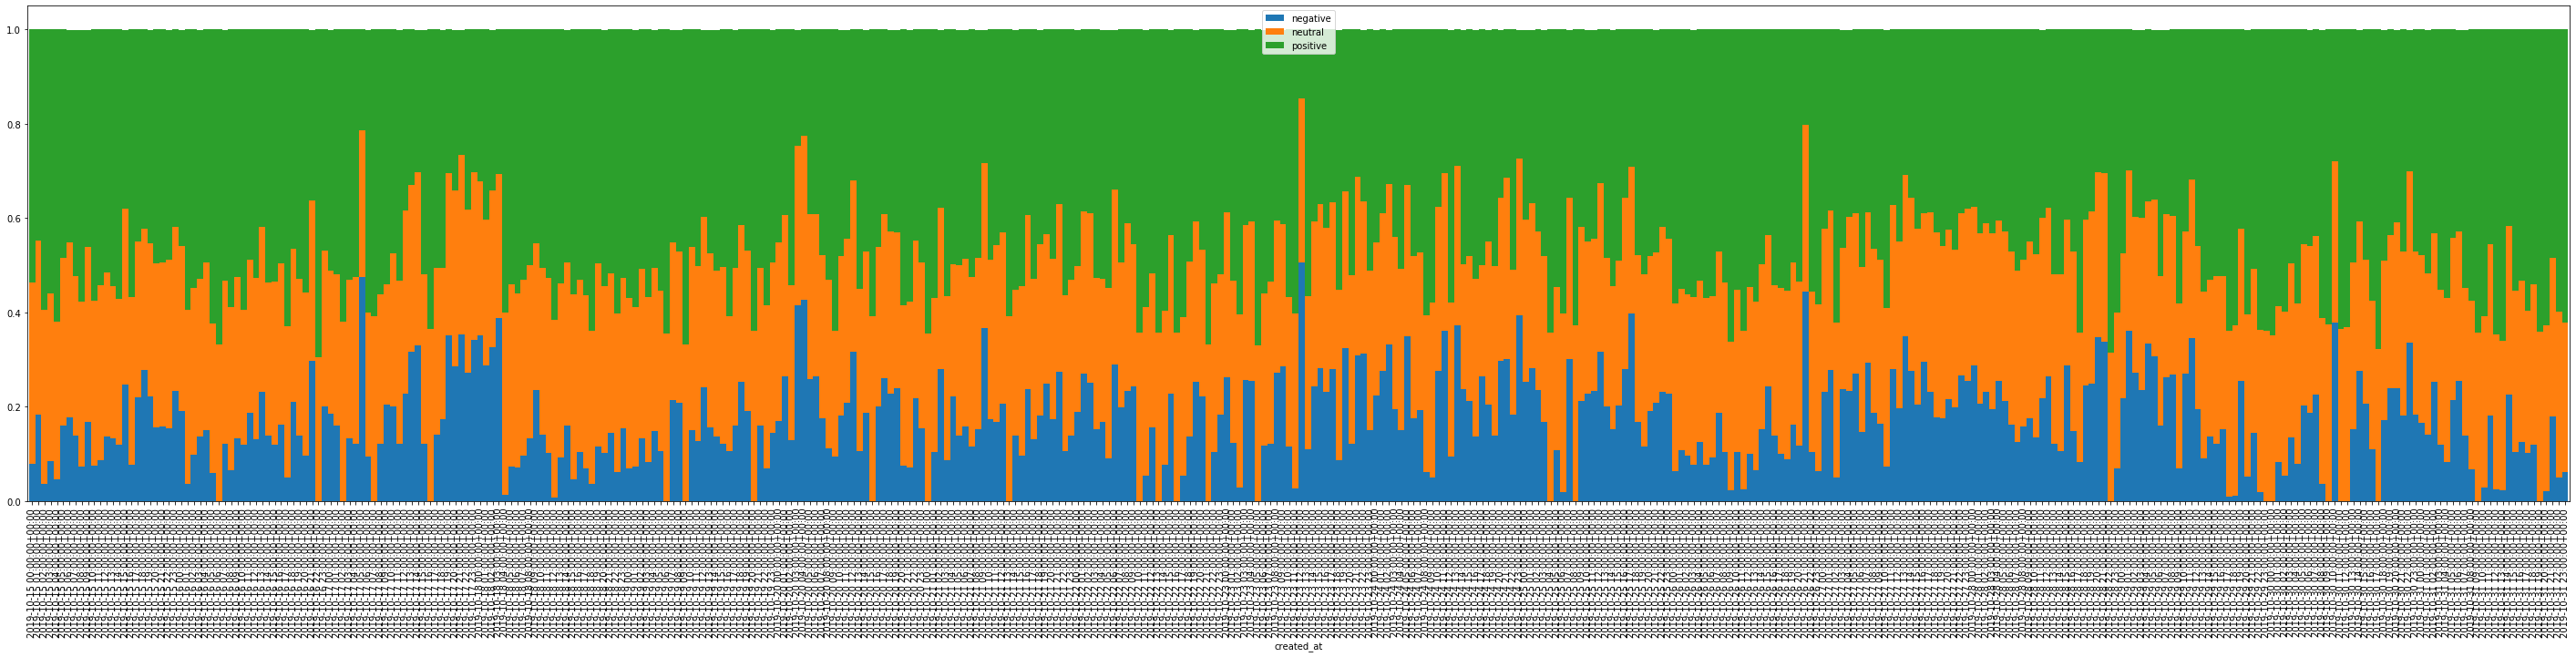

In [52]:
tweet_sentiment_df[tweet_sentiment_df['neutral']<.4].resample('H', on='created_at').mean().plot(figsize=(50,10), kind='bar', stacked=True, width=1.0)

In [53]:
dirty_hourly_btc = pathlib.Path('../../../data/dirty/crypto/Coinbase_BTCUSD_1h.csv')
BTC_price = pd.read_csv(dirty_hourly_btc,header=1)
BTC_price.head()

,2019-11-13 03-AM,BTCUSD,8733.04,8743.91,8731.64,8743.88,26.75,233692.05
0,2019-11-13 02-AM,BTCUSD,8764.90,8764.90,8726.57,8733.04,233.40,2040299.62
1,2019-11-13 01-AM,BTCUSD,8779.99,8780.00,8758.45,8764.90,106.46,933208.20
2,2019-11-13 12-AM,BTCUSD,8810.00,8838.80,8758.39,8779.99,216.42,1902443.64
3,2019-11-12 11-PM,BTCUSD,8770.74,8810.00,8760.61,8810.00,203.20,1784356.95
4,2019-11-12 10-PM,BTCUSD,8762.48,8786.76,8747.10,8770.74,178.10,1560490.62


# Save Sentiment as Pickle File 





In [73]:
tweet_sentiment_df.to_pickle("./twitter_sentiment.pkl")